In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt

In [8]:
train_path = 'training/'
test_path = 'testing/'

In [33]:
train_data = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                validation_split = 0.2,
                                rotation_range = 0.2,
                                zoom_range = 0.2
                               )\
.flow_from_directory(directory = train_path,
                     target_size = (190,190),
                     classes = ['invalid', 'valid'],
                     batch_size = 10,
                     color_mode ='grayscale'
                    )

Found 170 images belonging to 2 classes.


In [35]:
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = test_path,
                     target_size = (190,190),
                     classes = ['invalid', 'valid'],
                     batch_size=10,
                     color_mode= 'grayscale',
                     shuffle = False
                    )

Found 71 images belonging to 2 classes.


In [37]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

IndexError: index 1 is out of bounds for axis 2 with size 1

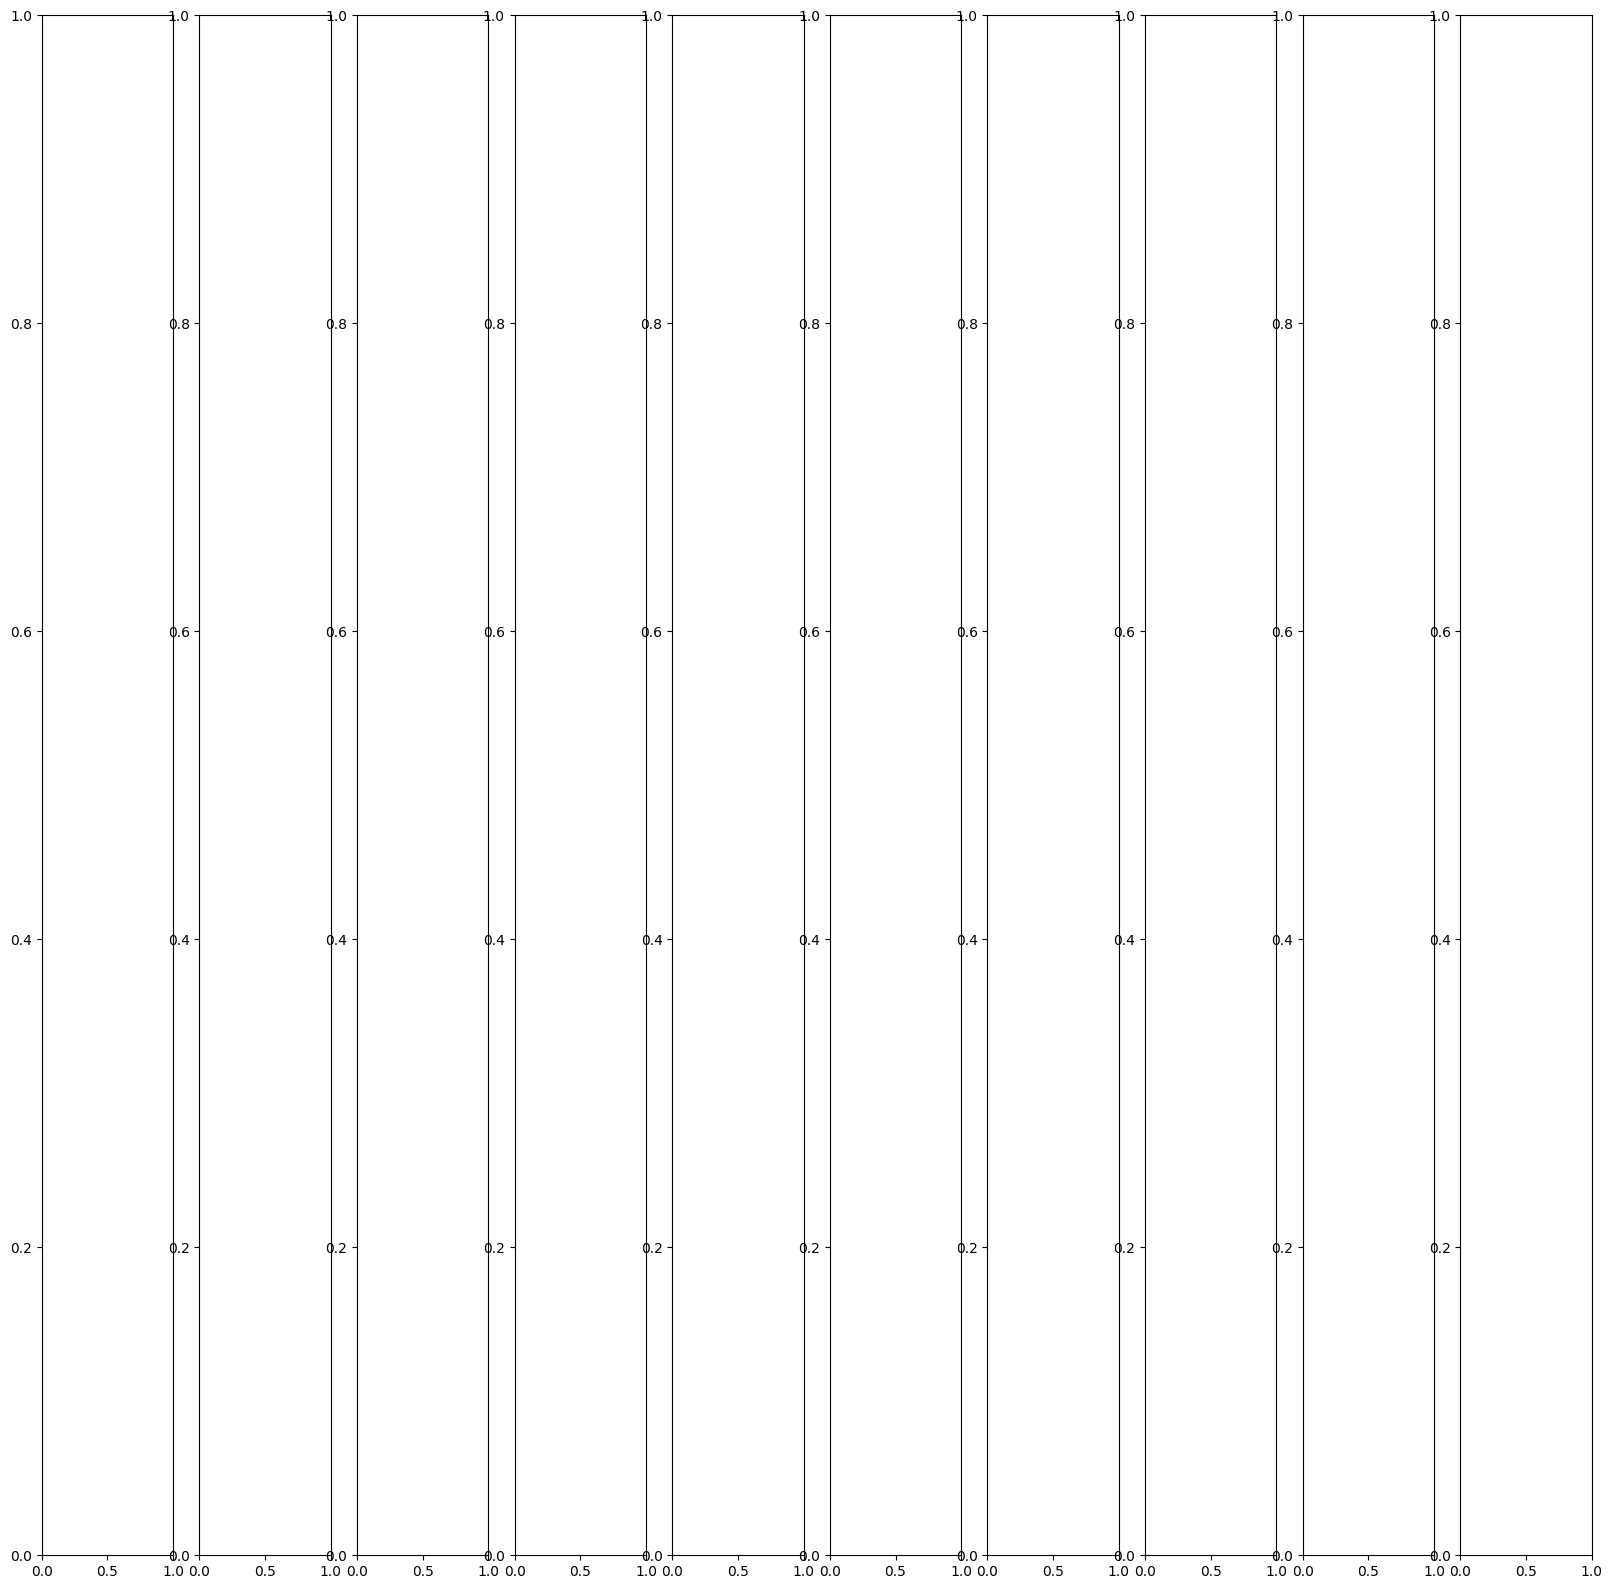

In [41]:
plotImages(imgs)
print(labels)

In [31]:
imgs,labels= next(train_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

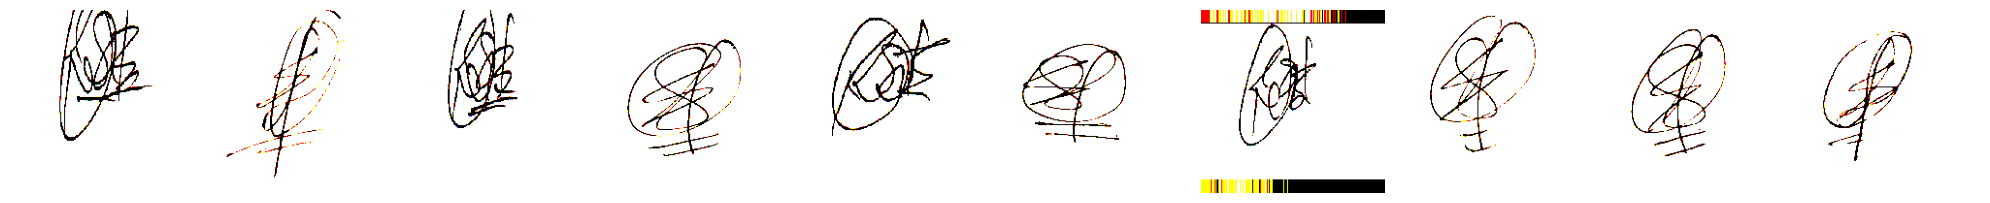

In [32]:
plotImages(imgs)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(190,190,1)),
    
    MaxPool2D(pool_size=(2,2), strides = 2),
    Conv2D(filters= 64 , kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides = 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax'),
])